In [9]:
from library.simulator import BackTester, Runner
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
# CSVデータを読み込む
df = pd.read_csv(
    "input_data/btf_periods900.csv",
)
# UNIXtimeをpandas.Timestampに変換する
df["CloseTime"] = pd.to_datetime(df["CloseTime"], unit="s")

rename_dict = {
    "CloseTime": "timestamp",
    "OpenPrice": "open",
    "HighPrice": "high",
    "LowPrice": "low",
    "ClosePrice": "close",
    "Volume": "volume",
}
df = df[list(rename_dict.keys())].rename(columns=rename_dict).set_index("timestamp")

config = {"slippage": 0.001, "minutes_to_expire": 60}
tester = BackTester(df, config)
runner = Runner(tester=tester)
runner.run()
snapshots = tester.snapshots
print(snapshots)

                               cash  position       valuation
timestamp                                                    
2023-01-26 21:45:00  1000000.000000  0.000000  1000000.000000
2023-01-26 22:00:00   570083.855714  0.142913   999570.546608
2023-01-26 22:15:00   847024.714927  0.050684   999369.908542
2023-01-26 22:30:00   383244.888290  0.204995   998740.219670
2023-01-26 22:45:00   944353.343882  0.017659   997299.156249
...                             ...       ...             ...
2023-04-01 01:15:00    37835.478723  0.028467   145419.620504
2023-04-01 01:30:00    52764.429671  0.024517   145501.235940
2023-04-01 01:45:00    28656.744811  0.030881   145508.263140
2023-04-01 02:00:00    62498.961214  0.021974   146072.807807
2023-04-01 02:15:00    22160.049959  0.032553   146168.380586

[6160 rows x 3 columns]


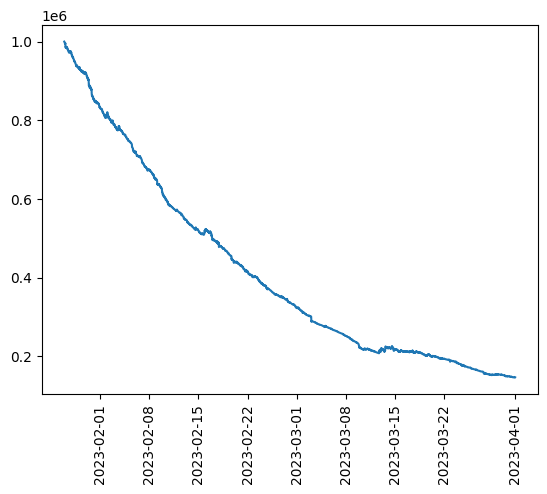

In [11]:
fig, ax = plt.subplots()
plt.xticks(rotation=90)


ax.plot(snapshots.index, snapshots["valuation"])
plt.show()